# 第一章：Coordinates

## 一.Vector

### 1.building vectors

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [153]:
data = pd.read_csv('shs.csv',index_col='date',parse_dates=True)[['open','close','high','low']]

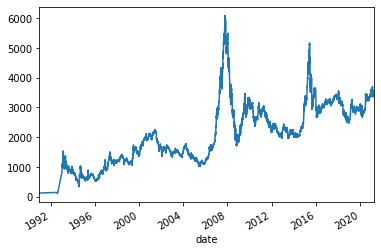

In [154]:
data['close'].plot()

In [155]:
#最大回撤 时间复杂度较高

def get_max_drawdown_sys(array):
    cumsum = array.cummax()
    return max((cumsum-array)/cumsum)

0.782720162413295
5.390625
0.782720162413295
0.296875
0.7827201624132949
0.0


In [163]:
'''
海龟策略
'''
data = data.loc['2005':,:]
atr = ta.ATR(data['high'],data['low'],data['close'],timeperiod=20) #ATR仓位线
up = data['close'].rolling(10).max().shift(1) #上轨
down = data['close'].rolling(20).min().shift(1) #下轨

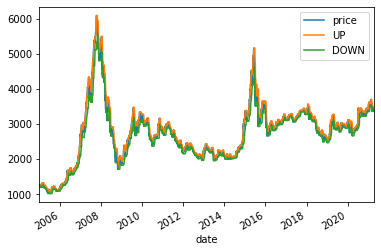

In [164]:
data['close'].plot(label='price')
up.plot(label='UP')
down.plot(label='DOWN')
plt.legend()

In [165]:
buy_sig = np.array([])
sell_sig = np.array([])
start_idx = np.where(data['close'] > up)[0][0]
hold = np.zeros(start_idx)
price = np.zeros(start_idx)
ret = np.array([])
money = np.zeros(start_idx)
balance = np.repeat(100*data['close'][start_idx],start_idx)
for i in range(start_idx, len(data)):
    if (data['close'][i] > up[i]):
        buy_sig = np.append(buy_sig, data.index[i])
        new = 100 - hold[i-1]
        hold = np.append(hold,100)
        price = np.append(price,(price[i-1] * hold[i-1] + data['close'][i] * new) / hold[i])
        balance = np.append(balance,balance[i-1]-data['close'][i]*new)
        money = np.append(money, balance[i]+data['close'][i]*hold[i])
    elif (data['close'][i] < (data['close'][i-1]-0.5*atr[i]) and hold[i-1] > 0):
        sell_sig = np.append(sell_sig,data.index[i])
        sell = int(0.25*hold[i-1]) #卖盘数
        hold = np.append(hold,hold[i-1] - sell) #剩余持仓数
        price = np.append(price,(price[i-1] * hold[i-1] - data['close'][i] * sell) / hold[i]) #成本均价
        ret = np.append(ret, sell * (data['close'][i]-price[i-1])) #卖出获得收益
        balance = np.append(balance,balance[i-1]+sell*data['close'][i])
        money = np.append(money,balance[i]+data['close'][i]*hold[i])
    elif (data['close'][i] < (data['close'][i-1]-1*atr[i]) and hold[i-1] > 0):
        sell_sig = np.append(sell_sig,data.index[i])
        sell = int(0.5*hold[i-1])
        hold = np.append(hold,hold[i-1] - sell)
        price = np.append(price,(price[i-1] * hold[i-1] - data['close'][i] * sell) / hold[i])
        ret = np.append(ret, sell * (data['close'][i]-price[i-1]))
        balance = np.append(balance,balance[i-1]+sell*data['close'][i])
        money = np.append(money,balance[i]+data['close'][i]*hold[i])
    elif (data['close'][i] < (data['close'][i-1]-1.5*atr[i]) and hold[i-1] > 0):
        sell_sig = np.append(sell_sig,data.index[i])
        sell = int(0.75*hold[i-1])
        hold = np.append(hold,hold[i-1] - sell)
        price = np.append(price,(price[i-1] * hold[i-1] - data['close'][i] * sell) / hold[i])
        ret = np.append(ret, sell * (data['close'][i]-price[i-1]))
        balance = np.append(balance,balance[i-1]+sell*data['close'][i])
        money = np.append(money,balance[i]+data['close'][i]*hold[i])
    elif (data['close'][i] < (data['close'][i-1]-2*atr[i]) and hold[i-1] > 0):
        sell_sig = np.append(sell_sig,data.index[i])
        sell = hold[i-1]
        hold = np.append(hold,hold[i-1] - sell)
        price = np.append(price, 0)
        ret = np.append(ret, sell * (data['close'][i]-price[i-1]))
        balance = np.append(balance,balance[i-1]+sell*data['close'][i])
        money = np.append(money,balance[i]+data['close'][i]*hold[i])
    elif (data['close'][i] < down[i] and hold[i-1] > 0):
        sell_sig = np.append(sell_sig,data.index[i])
        sell = hold[i-1]
        hold = np.append(hold,hold[i-1] - sell)
        price = np.append(price, 0)
        ret = np.append(ret, sell * (data['close'][i]-price[i-1]))
        balance = np.append(balance,balance[i-1]+sell*data['close'][i])
        money = np.append(money,balance[i]+data['close'][i]*hold[i])
    else:
        price = np.append(price, price[i-1])
        hold = np.append(hold,hold[i-1])
        balance = np.append(balance,balance[i-1])
        money = np.append(money,balance[i]+data['close'][i]*hold[i])

In [166]:
result = pd.DataFrame({'money':money,'price':price,'hold':hold})
result = result[result['money']>0]
result.index = data.index[start_idx:]

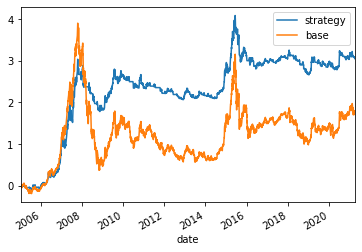

In [168]:
net_am = result['money'] / result['money'][0] -1
(net_am).plot(label='strategy')
((data['close'] / data['close'].shift(1)).cumprod()-1).plot(label='base')
plt.legend() #策略对比

In [66]:
'''
第二个经典策略：双均线策略
'''
#金叉：短期均线上穿长期均线，买入的标志
#死叉：短期均线下跌长期均线，卖出的标志
data['open'].rolling(5).mean()
data['open'].rolling(60).mean()

date
2001-08-27            NaN
2001-08-28            NaN
2001-08-29            NaN
2001-08-30            NaN
2001-08-31            NaN
                 ...     
2021-04-02    2116.891667
2021-04-06    2119.575333
2021-04-07    2121.476333
2021-04-08    2121.180167
2021-04-09    2120.263500
Name: open, Length: 4685, dtype: float64

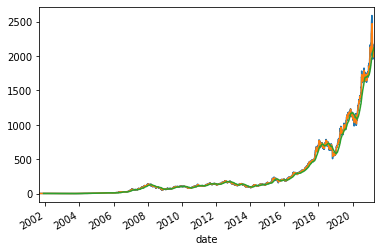

In [68]:
data['open'].plot()
data['open'].rolling(5).mean().plot()
data['open'].rolling(60).mean().plot()

In [69]:
#计算5日均线数据和60日均线数据
five_avg = data['open'].rolling(5).mean()
sixty_avg = data['open'].rolling(60).mean()
diff = five_avg-sixty_avg
diff_ = diff.loc['2010':]

In [70]:
# FFFTTTFFF
# TTTFFFTTT
#  TTTFFFTTT
#取买入日期，不用循环的方法：
sr1 = five_avg < sixty_avg #今天5<60
sr2 = five_avg >= sixty_avg #昨天5>=60。其实等于-sr1
sell = diff_[sr1 & (-sr1).shift(1)].index #卖出死叉点（今日5<60并且昨日5>=60）
buy = diff_[(-sr1) & sr1.shift(1)].index #买入金叉点 (今日5>=60并且昨日5<60)

In [71]:
#存储相应的买入卖出点，传统循环法
buy_sig = np.array([])
sell_sig = np.array([])
for i in range(1,len(diff_)):
    if diff_[i-1]<0 and diff_[i]>=0:
        buy_sig = np.append(buy_sig, diff_.index[i]) #买入金叉点
    if diff_[i-1]>0 and diff_[i]<=0:
        sell_sig = np.append(sell_sig,diff_.index[i]) #卖出死叉点
 

In [72]:
#从2010年开始实施策略，截止到现在，账户资产
time = min(len(buy_sig),len(sell_sig))
account = 100000
for j in range(time):
    hold = account / data.loc[buy_sig[j],'open']
    print('本次买入时点为：{:%Y-%m-%d};共计{:.2f}股;价值：{:.2f}'.format(buy_sig[j],hold,account))
    if buy_sig[j]>sell_sig[j]:
        account = hold * data.loc[sell_sig[j+1],'open']
        print('本次卖出时点为：{:%Y-%m-%d};共计{:.2f}股;价值：{:.2f}'.format(sell_sig[j+1],hold,account))
    else:
        account = hold * data.loc[sell_sig[j],'open']
        print('本次卖出时点为：{:%Y-%m-%d};共计{:.2f}股;价值：{:.2f}'.format(sell_sig[j],hold,account))

print('本策略最终价值为:{:.2f},总收益为:{:.2f}'.format(account,account-100000))


本次买入时点为：2010-01-20;共计922.28股;价值：100000.00
本次卖出时点为：2010-01-25;共计922.28股;价值：96433.55
本次买入时点为：2010-02-11;共计879.60股;价值：96433.55
本次卖出时点为：2010-02-26;共计879.60股;价值：94850.26
本次买入时点为：2010-07-21;共计1078.69股;价值：94850.26
本次卖出时点为：2011-01-10;共计1078.69股;价值：124803.31
本次买入时点为：2011-03-18;共计1022.18股;价值：124803.31
本次卖出时点为：2011-04-06;共计1022.18股;价值：118120.29
本次买入时点为：2011-04-28;共计1007.02股;价值：118120.29
本次卖出时点为：2011-09-19;共计1007.02股;价值：146942.17
本次买入时点为：2011-10-31;共计999.16股;价值：146942.17
本次卖出时点为：2011-12-14;共计999.16股;价值：140464.59
本次买入时点为：2012-02-28;共计983.23股;价值：140464.59
本次卖出时点为：2012-08-20;共计983.23股;价值：164266.68
本次买入时点为：2012-10-11;共计931.54股;价值：164266.68
本次卖出时点为：2012-11-09;共计931.54股;价值：158668.10
本次买入时点为：2013-05-08;共计1161.15股;价值：158668.10
本次卖出时点为：2013-07-19;共计1161.15股;价值：161444.41
本次买入时点为：2014-01-28;共计1528.89股;价值：161444.41
本次卖出时点为：2014-05-14;共计1528.89股;价值：183825.80
本次买入时点为：2014-06-30;共计1532.99股;价值：183825.80
本次卖出时点为：2014-10-13;共计1532.99股;价值：205479.33
本次买入时点为：2014-12-03;共计1489.30股;价值：205479.33
本次卖出时点为：2015-07-08;共计1489

In [73]:
times = pd.concat([pd.Series(buy_sig,name='buy'),pd.Series(sell_sig,name='sell')],axis=1)
times['index']=times.index
times_ = times.melt(id_vars=['index'],value_name='date',var_name='side')[['side','date']]

In [74]:
times_ = times_.sort_values(by='date',ascending=True)

In [77]:
money = 100000
hold = 0
for i in range(len(times_)):
    if pd.isna(times_.loc[times_.index[i],'date']):
        break
    if times_.loc[times_.index[i],'side'] == 'buy':
        price = data.loc[times_.loc[times_.index[i],'date'],'open']
        hold = money // (price*100)
        money -= hold * 100 * price
        print('本次买入时点为：{:%Y-%m-%d};共计{:.2f}手;价值：{:.2f},账户余额：{}'.format(times_.loc[i,'date'],hold,account,money))
    else:
        price = data.loc[times_.loc[times_.index[i],'date'],'open']
        money += hold * 100 * price
        print('本次卖出时点为：{:%Y-%m-%d};共计{:.2f}手;价值：{:.2f},账户余额：{}'.format(times_.loc[times_.index[i],'date'],hold,account,money))
        hold = 0


本次卖出时点为：2010-01-11;共计0.00手;价值：2090454.73,账户余额：100000.0
本次买入时点为：2010-02-11;共计9.00手;价值：2090454.73,账户余额：2415.699999999997
本次卖出时点为：2010-01-25;共计9.00手;价值：2090454.73,账户余额：96519.7
本次买入时点为：2011-03-18;共计8.00手;价值：2090454.73,账户余额：8813.300000000003
本次卖出时点为：2010-02-26;共计8.00手;价值：2090454.73,账户余额：95079.7
本次买入时点为：2011-10-31;共计10.00手;价值：2090454.73,账户余额：7148.699999999997
本次卖出时点为：2011-01-10;共计10.00手;价值：2090454.73,账户余额：122847.7
本次买入时点为：2012-10-11;共计10.00手;价值：2090454.73,账户余额：752.6999999999971
本次卖出时点为：2011-04-06;共计10.00手;价值：2090454.73,账户余额：116309.7
本次买入时点为：2014-01-28;共计9.00手;价值：2090454.73,账户余额：10742.399999999994
本次卖出时点为：2011-09-19;共计9.00手;价值：2090454.73,账户余额：142068.6
本次买入时点为：2014-12-03;共计9.00手;价值：2090454.73,账户余额：9710.100000000006
本次卖出时点为：2011-12-14;共计9.00手;价值：2090454.73,账户余额：136233.9
本次买入时点为：2016-02-26;共计9.00手;价值：2090454.73,账户余额：7659.89999999998
本次卖出时点为：2012-08-20;共计9.00手;价值：2090454.73,账户余额：158021.09999999998
本次买入时点为：2018-02-22;共计8.00手;价值：2090454.73,账户余额：16950.699999999983
本次卖出时点为：2012-11-09;共计8.00手;价值：20904